In [112]:
#affichage des résultats de calibration. Prédictions et densités à posteriori.
#Prédictions Ravik.
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import seaborn as sns
%matplotlib inline

mpl.rcParams['text.usetex']=True
#mpl.rcParams['font.sans-serif']='Arial'
mpl.rcParams['font.weight']='bold'
#mpl.rcParams['axes.labelsize']= 33.0 #def value : 11.0
#mpl.rcParams['axes.titlesize']= 28.0 #def value : 12.0
mpl.rcParams['savefig.format']='png'
mpl.rcParams['font.size']=22
mpl.rcParams['legend.fontsize']=18


Text(0, 0.5, 'Heat flux $[W.m^{-2}]$')

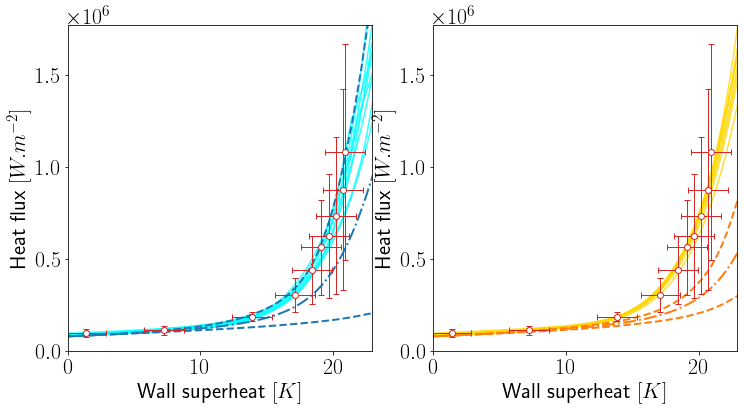

In [72]:
#belles figures pour l'affichage de prédictions.
colorfz='cyan'
colorf='tab:blue'
colorfzkoh='gold'
colorfkoh='tab:orange'
lw2=2
lw1=2
case=16

#cases=['3','4','5','6','14','15','16','18','20','21','22','23']
foldname='NIGP/results/'
foldname2='NIGP/results/separatedensities/opt/'
foldnamekoh='NIGP/results/separatedensities/kohs/'
obs=pd.DataFrame(data=np.loadtxt(foldname+'obs'+str(case)+'.gnu'),columns=['x','y','incx','incy'])
p=pd.DataFrame(data=np.loadtxt(foldname2+'predsF'+str(case)+'.gnu'),columns=['x','useless','q25','q75','q2p5','q97p5','fmean'])
pFZ=pd.DataFrame(data=np.loadtxt(foldname2+'preds'+str(case)+'.gnu'),columns=['x','mean','std','stdz','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10'])

pkoh=pd.DataFrame(data=np.loadtxt(foldnamekoh+'predsF'+str(case)+'.gnu'),columns=['x','useless','q25','q75','q2p5','q97p5','fmean'])
pFZkoh=pd.DataFrame(data=np.loadtxt(foldnamekoh+'preds'+str(case)+'.gnu'),columns=['x','mean','std','stdz','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10'])

fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(12,6))
axs[0].plot(p['x'],p['useless'],linewidth=lw2,linestyle='-.',color=colorf,label=r'$f(x,\theta_{\mathrm{pmean}})$')
axs[0].plot(p['x'],p['q97p5'],linewidth=lw1,linestyle='--',color=colorf,label=r'95$\%$ credence interval')
axs[0].plot(p['x'],p['q2p5'],linewidth=lw1,linestyle='--',color=colorf)

axs[1].plot(p['x'],pkoh['useless'],linewidth=lw2,linestyle='-.',color=colorfkoh,label=r'$f(x,\theta_{\mathrm{pmean}})$')
axs[1].plot(p['x'],pkoh['q97p5'],linewidth=lw1,linestyle='--',color=colorfkoh,label=r'95$\%$ credence interval')
axs[1].plot(p['x'],pkoh['q2p5'],linewidth=lw1,linestyle='--',color=colorfkoh)


ls=['s1','s2','s3','s4','s5','s6','s7','s8','s9']
#ls=['s5']
for s in ls:
    axs[0].plot(pFZ['x'],pFZ[s],linewidth=1.5,color=colorfz,zorder=0,alpha=0.8)
    axs[1].plot(pFZ['x'],pFZkoh[s],linewidth=1.5,color=colorfzkoh,zorder=0,alpha=0.8)
    
axs[0].errorbar(obs['x'],obs['y'],yerr=3*obs['incy'],xerr=3*obs['incx'],
             color='tab:red',marker='o',ms=6,mfc='white',
             capsize=3,linewidth=0,elinewidth=1,
             label='observations',zorder=100)

axs[1].errorbar(obs['x'],obs['y'],yerr=3*obs['incy'],xerr=3*obs['incx'],
             color='tab:red',marker='o',ms=6,mfc='white',
             capsize=3,linewidth=0,elinewidth=1,
             label='observations',zorder=100)

axs[0].set_xlim([0,obs['x'][len(obs['x'])-1]+2])
axs[0].set_ylim([0,obs['y'][len(obs['y'])-1]+3*obs['incy'][len(obs['y'])-1]+1e5])
axs[0].set_xlabel('Wall superheat $[K]$')
axs[0].set_ylabel('Heat flux $[W.m^{-2}]$')

axs[1].set_xlim([0,obs['x'][len(obs['x'])-1]+2])
axs[1].set_ylim([0,obs['y'][len(obs['y'])-1]+3*obs['incy'][len(obs['y'])-1]+1e5])
axs[1].set_xlabel('Wall superheat $[K]$')
axs[1].set_ylabel('Heat flux $[W.m^{-2}]$')
#print(obs)


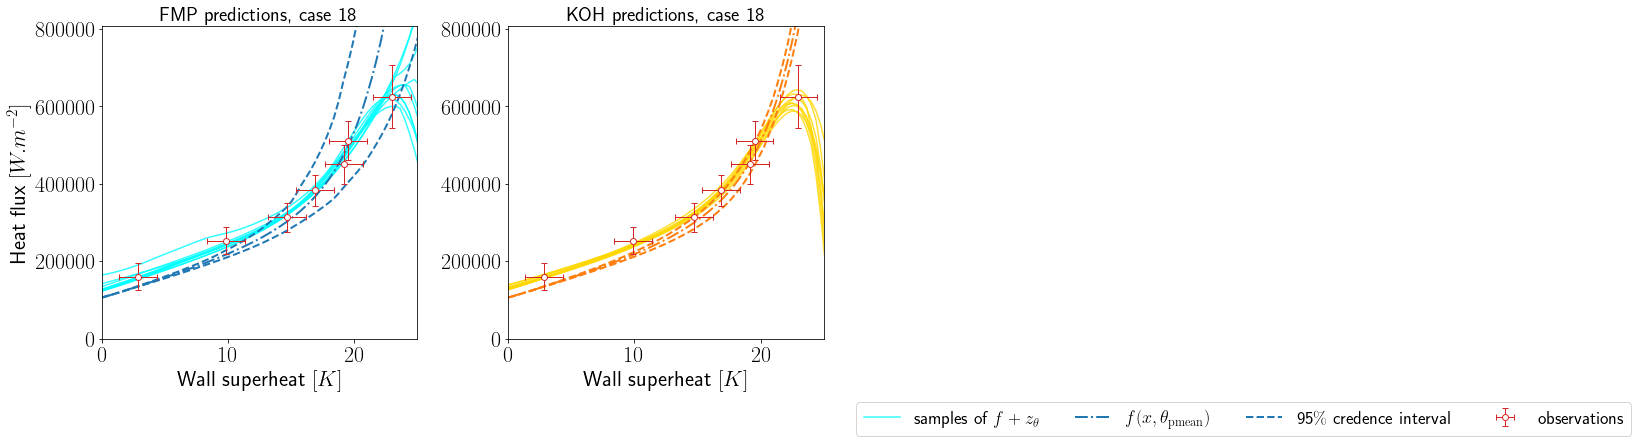

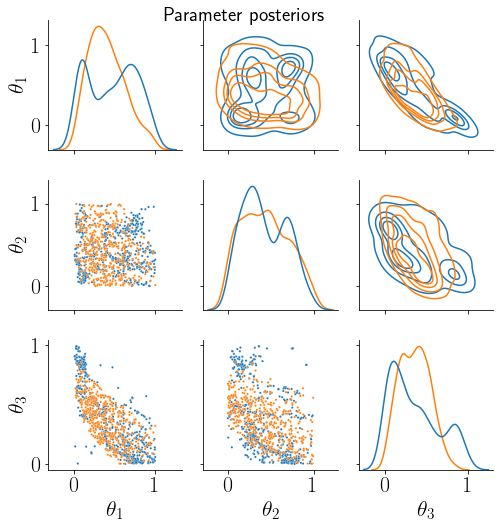

In [54]:
#plot combiné prédictions et postérieures
#belles figures pour l'affichage de prédictions.
colorfz='cyan'
colorf='tab:blue'
colorfzkoh='gold'
colorfkoh='tab:orange'
lw2=2
lw1=2
case=18

#cases=['3','4','5','6','14','15','16','18','20','21','22','23']
foldname='NIGP/results/'
foldname2='NIGP/results/separatedensities/opt/'
foldnamekoh='NIGP/results/separatedensities/kohs/'
obs=pd.DataFrame(data=np.loadtxt(foldname+'obs'+str(case)+'.gnu'),columns=['x','y','incx','incy'])
p=pd.DataFrame(data=np.loadtxt(foldname2+'predsF'+str(case)+'.gnu'),columns=['x','useless','q25','q75','q2p5','q97p5','fmean'])
pFZ=pd.DataFrame(data=np.loadtxt(foldname2+'preds'+str(case)+'.gnu'),columns=['x','mean','std','stdz','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10'])

pkoh=pd.DataFrame(data=np.loadtxt(foldnamekoh+'predsF'+str(case)+'.gnu'),columns=['x','useless','q25','q75','q2p5','q97p5','fmean'])
pFZkoh=pd.DataFrame(data=np.loadtxt(foldnamekoh+'preds'+str(case)+'.gnu'),columns=['x','mean','std','stdz','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10'])

fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(12,6))
axs[0].plot(pFZ['x'],pFZ['s1'],linewidth=1.5,color=colorfz,zorder=0,alpha=0.8,label=r'samples of $f+z_{\theta}$')
axs[0].plot(p['x'],p['useless'],linewidth=lw2,linestyle='-.',color=colorf,label=r'$f(x,\theta_{\mathrm{pmean}})$')
axs[0].plot(p['x'],p['q97p5'],linewidth=lw1,linestyle='--',color=colorf,label=r'95$\%$ credence interval')
axs[0].plot(p['x'],p['q2p5'],linewidth=lw1,linestyle='--',color=colorf)

axs[1].plot(p['x'],pkoh['useless'],linewidth=lw2,linestyle='-.',color=colorfkoh,label=r'$f(x,\theta_{\mathrm{pmean}})$')
axs[1].plot(p['x'],pkoh['q97p5'],linewidth=lw1,linestyle='--',color=colorfkoh,label=r'95$\%$ credence interval')
axs[1].plot(p['x'],pkoh['q2p5'],linewidth=lw1,linestyle='--',color=colorfkoh)

###load dfs
dfopt=pd.DataFrame(data=np.loadtxt(foldname2+'samp'+str(case)+'.gnu')[:,:3],columns=[r'$\theta_1$',r'$\theta_2$',r'$\theta_3$'])
dfkohs=pd.DataFrame(data=np.loadtxt(foldnamekoh+'samp'+str(case)+'.gnu')[:,:3],columns=[r'$\theta_1$',r'$\theta_2$',r'$\theta_3$'])
dfopt['Calibration']='FMP'
dfkohs['Calibration']='KOH separate'
df=pd.concat([dfopt,dfkohs],ignore_index=True)

ls=['s1','s2','s3','s4','s5','s6','s7','s8','s9']
#ls=['s5']

for s in ls:
    axs[0].plot(pFZ['x'],pFZ[s],linewidth=1.5,color=colorfz,zorder=0,alpha=0.8)
    axs[1].plot(pFZ['x'],pFZkoh[s],linewidth=1.5,color=colorfzkoh,zorder=0,alpha=0.8)
    
axs[0].errorbar(obs['x'],obs['y'],yerr=3*obs['incy'],xerr=3*obs['incx'],
             color='tab:red',marker='o',ms=6,mfc='white',
             capsize=3,linewidth=0,elinewidth=1,
             label='observations',zorder=100)

axs[1].errorbar(obs['x'],obs['y'],yerr=3*obs['incy'],xerr=3*obs['incx'],
             color='tab:red',marker='o',ms=6,mfc='white',
             capsize=3,linewidth=0,elinewidth=1,
             label='observations',zorder=100)

axs[0].set_xlim([0,obs['x'][len(obs['x'])-1]+2])
axs[0].set_ylim([0,obs['y'][len(obs['y'])-1]+3*obs['incy'][len(obs['y'])-1]+1e5])
axs[0].set_xlabel('Wall superheat $[K]$')
axs[0].set_ylabel('Heat flux $[W.m^{-2}]$')
axs[0].set_title('FMP predictions, case '+str(case),fontsize=20)

axs[1].set_xlim([0,obs['x'][len(obs['x'])-1]+2])
axs[1].set_ylim([0,obs['y'][len(obs['y'])-1]+3*obs['incy'][len(obs['y'])-1]+1e5])
axs[1].set_xlabel('Wall superheat $[K]$')
#axs[1].set_ylabel('Heat flux $[W.m^{-2}]$')
axs[1].set_title('KOH predictions, case '+str(case),fontsize=20)
#print(obs)
plt.tight_layout()

g = sns.PairGrid(df,hue='Calibration',diag_sharey=False,
                palette={
                    'FMP':colorf,
                    'KOH separate':colorfkoh
                })
g.map_diag(sns.kdeplot)
g.map_upper(sns.kdeplot,levels=5)
g.map_lower(sns.scatterplot,s=5)
g.fig.suptitle('Parameter posteriors',fontsize=20)
axs[0].legend(ncol=5,bbox_to_anchor=(1, 0.05),
          bbox_transform=fig.transFigure)


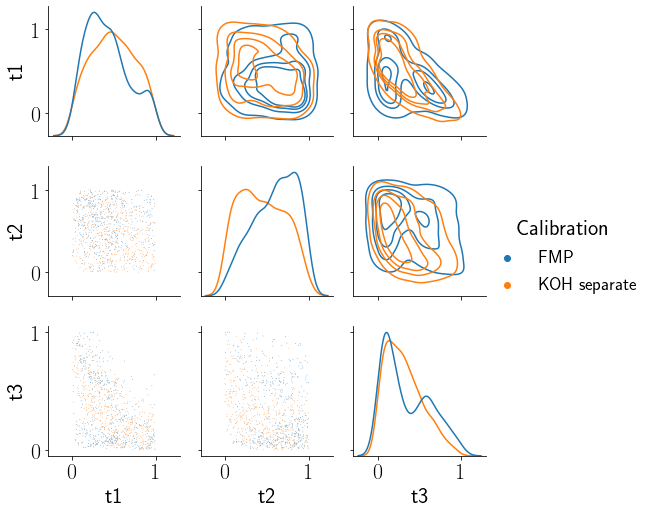

In [74]:

#plots pour comparer les densités KOH et FMP.
foldname1='NIGP/results/separatedensities/kohs/'
foldname2='NIGP/results/separatedensities/opt/'
case=16
dfopt=pd.DataFrame(data=np.loadtxt(foldname2+'samp'+str(case)+'.gnu')[:,:3],columns=['t1','t2','t3'])
#dffb=pd.DataFrame(data=np.loadtxt(foldname+"save/sampfb23.gnu")[:,:3],columns=['t1','t2','t3'])#on met le dfkoh non constant pour pouvoir faire un histogramme..
#dfkohp=pd.DataFrame(data=np.loadtxt(foldname+"save/sampkohp23.gnu")[:,:3],columns=['t1','t2','t3'])
dfkohs=pd.DataFrame(data=np.loadtxt(foldname1+'samp'+str(case)+'.gnu')[:,:3],columns=['t1','t2','t3'])


#on marque les données KOH et OPT
dfopt['Calibration']='FMP'
#dffb['Calibration']='Bayes'
dfkohs['Calibration']='KOH separate'
#dfkohp['Calibration']='KOH pooled'

df=pd.concat([dfopt,dfkohs],ignore_index=True)


#dfh=df[[strsigma1,strsobs1,strl1,'Calibration']] #dataframe contient les hyperparamètres
dfp=df[['t1','t2','t3','Calibration']]






g = sns.PairGrid(dfp,hue='Calibration',diag_sharey=False)
g.map_diag(sns.kdeplot)
g.map_upper(sns.kdeplot,levels=5)
g.map_lower(sns.scatterplot,s=0.5)
g.add_legend()






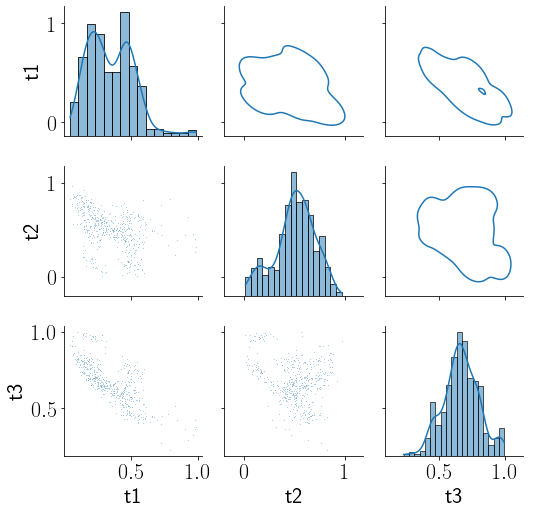

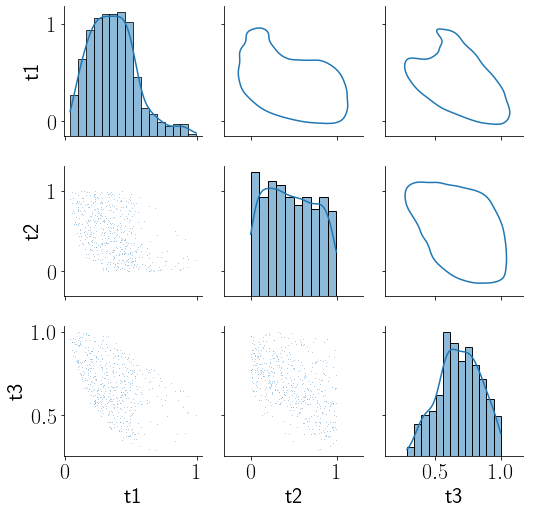

In [111]:

#plots pour montrer que l'approximation par KDE n'est pas trop mauvaise.
#la KDE est discutable pour FMP dans les cas suivants :
#la KDE est discutable pour KOH dans les cas suivants :

foldname1='NIGP_zeromean/results/separatedensities/kohs/'
foldname2='NIGP_zeromean/results/separatedensities/opt/'
case=16
dfopt=pd.DataFrame(data=np.loadtxt(foldname2+'samp'+str(case)+'.gnu')[:,:3],columns=['t1','t2','t3'])
#dffb=pd.DataFrame(data=np.loadtxt(foldname+"save/sampfb23.gnu")[:,:3],columns=['t1','t2','t3'])#on met le dfkoh non constant pour pouvoir faire un histogramme..
#dfkohp=pd.DataFrame(data=np.loadtxt(foldname+"save/sampkohp23.gnu")[:,:3],columns=['t1','t2','t3'])
dfkohs=pd.DataFrame(data=np.loadtxt(foldname1+'samp'+str(case)+'.gnu')[:,:3],columns=['t1','t2','t3'])


#on marque les données KOH et OPT
dfopt['Calibration']='FMP'
#dffb['Calibration']='Bayes'
dfkohs['Calibration']='KOH separate'
#dfkohp['Calibration']='KOH pooled'

df=pd.concat([dfopt,dfkohs],ignore_index=True)


#dfh=df[[strsigma1,strsobs1,strl1,'Calibration']] #dataframe contient les hyperparamètres
dfp=df[['t1','t2','t3','Calibration']]






g = sns.PairGrid(dfopt[['t1','t2','t3']],diag_sharey=False)
g.map_diag(sns.histplot,kde=True)
g.map_upper(sns.kdeplot,levels=2)
g.map_lower(sns.scatterplot,s=0.5)
g.add_legend()

h = sns.PairGrid(dfkohs[['t1','t2','t3']],diag_sharey=False)
h.map_diag(sns.histplot,kde=True)
h.map_upper(sns.kdeplot,levels=2)
h.map_lower(sns.scatterplot,s=0.5)
h.add_legend()






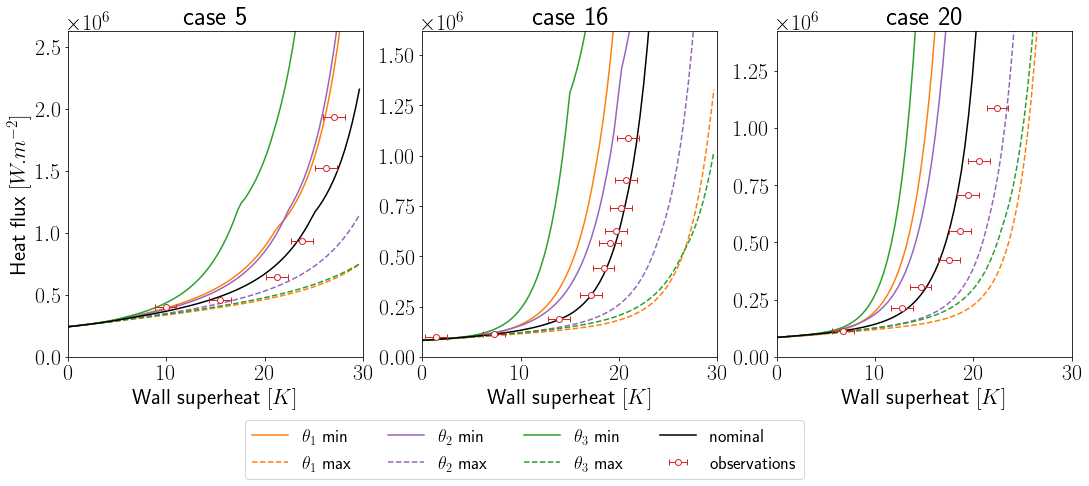

In [42]:
#plots des OAT
cfb='tab:blue'
lw2=1
lw1=1.5
foldname='NIGP_zeromean/results/'
foldname1='OAT/results/'
labels2=['c0+','c0-','c1+','c1-','c3+','c3-']

names=[r'$\theta_1$ min',r'$\theta_1$ max',r'$\theta_2$ min',r'$\theta_2$ max',r'$\theta_3$ min',r'$\theta_3$ max']
def plot_case_ax(case,ax):
    obs=pd.DataFrame(data=np.loadtxt(foldname+'obs'+str(case)+'.gnu'),columns=['x','y','incx','incy'])
    nom=pd.DataFrame(data=np.loadtxt(foldname1+'cnom'+str(case)+'.gnu'),columns=['x','pred'])
    l=[]
    colors=['tab:orange','tab:purple','tab:green']
    for lab in labels2:
        p=pd.DataFrame(data=np.loadtxt(foldname1+lab+str(case)+'.gnu'),columns=['x','pred'])
        l.append(p)  
    for i in range(3):
        ax.plot(l[2*i]['x'],l[2*i]['pred'],linewidth=lw1,linestyle='-',color=colors[i],label=names[2*i])
        ax.plot(l[2*i+1]['x'],l[2*i+1]['pred'],linewidth=lw1,linestyle='--',color=colors[i],label=names[2*i+1])
    ax.plot(nom['x'],nom['pred'],linestyle='-',color='black',label='nominal')
    ax.set_xlim([0,30])
    ax.set_ylim([0,obs['y'][len(obs['y'])-1]+3*obs['incy'][len(obs['y'])-1]+1e5])
    ax.errorbar(obs['x'],obs['y'],xerr=3*obs['incx'],
                 color='tab:red',marker='o',ms=6,mfc='white',
                 capsize=3,linewidth=0,elinewidth=1,
                 label='observations',zorder=100)

fig,axs=plt.subplots(nrows=1,ncols=3,figsize=(18,6))
plot_case_ax(5,axs[0])
plot_case_ax(16,axs[1])
plot_case_ax(20,axs[2])
axs[0].set_title('case 5')
axs[1].set_title('case 16')
axs[2].set_title('case 20')
axs[0].set_xlabel('Wall superheat $[K]$')
axs[1].set_xlabel('Wall superheat $[K]$')
axs[2].set_xlabel('Wall superheat $[K]$')
axs[0].set_ylabel('Heat flux $[W.m^{-2}]$')
axs[0].legend(ncol=4,bbox_to_anchor=(0.7, 0),
          bbox_transform=fig.transFigure)


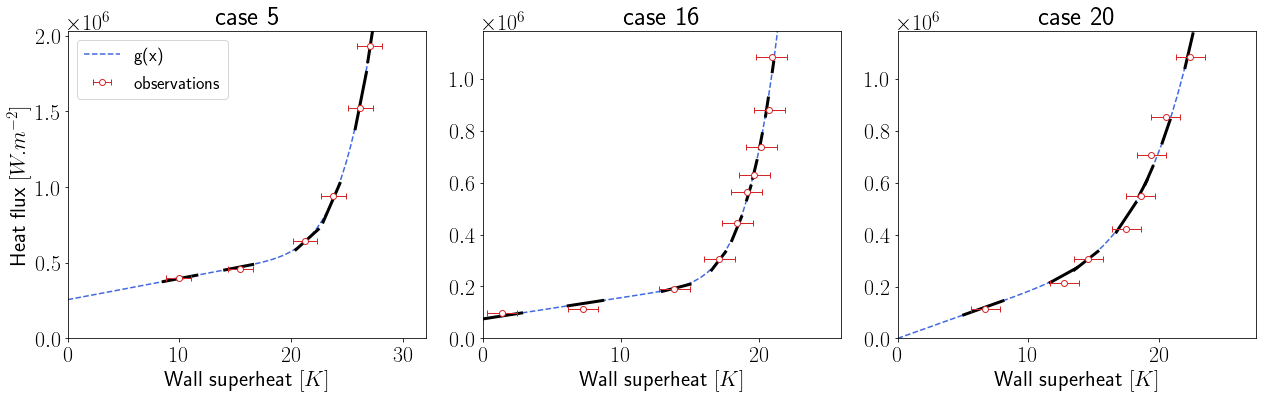

In [113]:
def findzero(fit,xvalue):
    #sorte de root finding: trouver la valeur de x dans le dataframe fit qui donne la valeur x la plus proche possible
    fit_sort = fit.iloc[(fit['x']-xvalue).abs().argsort()[:2]]
    return fit_sort.index.tolist()[0]

#on va faire une liste à la main pour que ça soit joli....

dxs=np.array([
            [3,2.5,2,1.5,1,0.5,0,0,0,0],
            [3,2.5,2,1,0.7,0.3,0.3,0.2,0.2,0.1],
            [3,2,1.8,1.5,.6,.6,.6,.6,0,0]])


#visualisation du fit polynômial.
foldname='NIGP_zeromean/results/'
cases=[5,16,20]
fig,axs=plt.subplots(nrows=1,ncols=3,figsize=(18,6))
for i in range(3):
    fit=pd.DataFrame(data=np.loadtxt(foldname+"fit"+str(cases[i])+".gnu"),columns=['x','g'])    
    obs=pd.DataFrame(data=np.loadtxt(foldname+'obs'+str(cases[i])+'.gnu'),columns=['x','y','incx','incy'])
    
    findzero(fit,1e5)
    
    axs[i].errorbar(obs['x'],obs['y'],xerr=3*obs['incx'],
             color='tab:red',marker='o',ms=6,mfc='white',
             capsize=3,linewidth=0,elinewidth=1,
             label='observations',zorder=100)
    axs[i].set_xlim(0,obs['x'][len(obs)-1]+5)
    axs[i].set_ylim(0,obs['y'][len(obs)-1]+1e5)
    axs[i].plot(fit['x'],fit['g'],color='royalblue',linestyle='--',label='g(x)')
    axs[0].legend()
    axs[i].set_title('case '+str(cases[i]))
    axs[i].set_xlabel('Wall superheat $[K]$')
    axs[0].set_ylabel('Heat flux $[W.m^{-2}]$')
    for index,row in obs.iterrows():
        #colorer la petite partie de la dérivée
        #il faut décaler les x du plot pour que ça corresponde aux x de la fonction.
        #taille linéaire décroissante. vaut 0.5 à x=30 et 3 à x=0 ->
        
        dx=dxs[i,index]
        deriv=row['incy']/row['incx']
        ind=findzero(fit,row['x'])
        xt=fit['x'].iloc[ind]
        yt=fit['g'].iloc[ind]
        x=[xt-dx/2,xt+dx/2]
        y=[yt-dx/2*deriv,yt+dx/2*deriv]
        axs[i].plot(x,y,color='black',lw=3)
plt.tight_layout()




In [ ]:
#visualisation d'un sample et d'une KDE pour voir s'il est bien représentatif. le sample est en trois dimensions. traçons les marginales.
foldname='NIGP/results/separatedensities/kohs/'
case=3
df=pd.DataFrame(data=np.loadtxt(foldname+'samp'+str(case)+'.gnu')[:,:3],columns=['t1','t2','t3'])
kde=stats.gaussian_kde(df.transpose())
fig,axs=plt.subplots(nrows=1,ncols=3,figsize=(18,6))




In [20]:
%%time
#construction des KDE KOH
foldnamek='NIGP/results/separatedensities/kohs/'
cases=['3','4','5','6','14','15','16','18','20','21','22','23']
#cases=['3']
filenamesk=[foldnamek+'samp'+lab+'.gnu' for lab in cases]
dfsk=[pd.DataFrame(data=np.loadtxt(x)[:,:3],columns=['t1','t2','t3']) for x in filenamesk]
#print(dfs)
kdesk=[stats.gaussian_kde(df.transpose()) for df in dfsk]
#attention c'est bien le log qu'on utilise pour la mcmc.
def compute_score_koh(x):
    #print([np.log(kde.evaluate(x)+1e-13) for kde in kdes])
    return sum([np.log(kde.evaluate(x)+1e-300) for kde in kdesk])
compute_score_koh([0.5,0.5,0.8])








CPU times: user 90.5 ms, sys: 0 ns, total: 90.5 ms
Wall time: 88.2 ms


array([-2187.55561745])

In [21]:
%%time
#Metropolis-Hastings KOH
# Metropolis Hastings sampling from the posterior distribution

Nsteps = int(1e6)
Nburn = int(1e5)
Nsamples = 500
f = Nsteps/Nsamples
naccept=0

xinit = 0.5*np.ones((3))
covinit = np.eye(3)*0.08**2

burns= []
samples_koh = []

#burn phase
x = xinit
s = compute_score_koh(xinit)
for i in range(Nburn):
    xn = np.random.multivariate_normal(x,covinit)
    sn = compute_score_koh(xn)
    if sn-s>np.log(np.random.rand()):
        naccept+=1
        x = xn
        s = sn
    burns.append(x)
print('accept rate burn phase : '+str(100*((1.0*naccept)/Nburn)))
naccept=0
#calcul de la matrice de covariance
burns=np.array(burns)
print(burns)

cov=((2.38**2)/3)*np.cov(np.array(burns).transpose())
print('new cov matrix : ')
print(cov)
#sampling phase

for i in range(Nsteps):
    xn = np.random.multivariate_normal(x,cov)
    sn = compute_score_koh(xn)
    if sn-s>np.log(np.random.rand()):
        naccept+=1
        x = xn
        s = sn
    if i % f == 0:
        samples_koh.append(x)

samples_koh = np.array(samples_koh)

print('final accept rate: '+str(100*((1.0*naccept)/Nsteps)))
print('samples :')
print(len(samples_koh))
print(samples_koh)

accept rate burn phase : 0.345
[[0.5        0.5        0.5       ]
 [0.5        0.5        0.5       ]
 [0.5        0.5        0.5       ]
 ...
 [0.60440316 0.65569859 0.42044368]
 [0.60440316 0.65569859 0.42044368]
 [0.60440316 0.65569859 0.42044368]]
new cov matrix : 
[[ 7.66640626e-05  1.47333718e-04 -1.13767404e-04]
 [ 1.47333718e-04  2.82535122e-03 -1.38076502e-03]
 [-1.13767404e-04 -1.38076502e-03  7.18483985e-04]]
final accept rate: 31.4359
samples :
500
[[0.60440316 0.65569859 0.42044368]
 [0.59931041 0.53985221 0.47753712]
 [0.60298912 0.62672139 0.43634396]
 ...
 [0.60971061 0.59007148 0.44260437]
 [0.60204791 0.53390032 0.47168389]
 [0.6148133  0.63403533 0.42353893]]
CPU times: user 13min 25s, sys: 0 ns, total: 13min 25s
Wall time: 13min 25s


In [22]:
%%time
#construction des KDE OPTI
foldnameo='NIGP/results/separatedensities/opt/'
cases=['3','4','5','6','14','15','16','18','20','21','22','23']
#cases=['3']
filenameso=[foldnameo+'samp'+lab+'.gnu' for lab in cases]
dfso=[pd.DataFrame(data=np.loadtxt(x)[:,:3],columns=['t1','t2','t3']) for x in filenameso]
#print(dfs)
kdeso=[stats.gaussian_kde(df.transpose()) for df in dfso]
#attention c'est bien le log qu'on utilise pour la mcmc.
def compute_score_opt(x):
    #print([np.log(kde.evaluate(x)+1e-13) for kde in kdes])
    return sum([np.log(kde.evaluate(x)) for kde in kdeso])
compute_score_opt([0.5,0.5,0.9])








CPU times: user 48.4 ms, sys: 0 ns, total: 48.4 ms
Wall time: 56.5 ms


array([-99.8754384])

In [23]:
%%time
#Metropolis-Hastings OPT

# Metropolis Hastings sampling from the posterior distribution

Nsteps = int(1e6)
Nburn = int(1e5)
Nsamples = 500
f = Nsteps/Nsamples
naccept=0

xinit = 0.5*np.ones((3))
covinit = np.eye(3)*0.05**2

burns= []
samples_opt = []

#burn phase
x = xinit
s = compute_score_opt(xinit)
for i in range(Nburn):
    xn = np.random.multivariate_normal(x,covinit)
    sn = compute_score_opt(xn)
    if sn-s>np.log(np.random.rand()):
        naccept+=1
        x = xn
        s = sn
    burns.append(x)
print('accept rate burn phase : '+str(100*((1.0*naccept)/Nburn)))
naccept=0
#calcul de la matrice de covariance
burns=np.array(burns)
print(burns)

cov=((2.38**2)/3)*np.cov(np.array(burns).transpose())
print('new cov matrix : ')
print(cov)
#sampling phase

for i in range(Nsteps):
    xn = np.random.multivariate_normal(x,cov)
    sn = compute_score_opt(xn)
    if sn-s>np.log(np.random.rand()):
        naccept+=1
        x = xn
        s = sn
    if i % f == 0:
        samples_opt.append(x)

samples_opt = np.array(samples_opt)

print('final accept rate: '+str(100*((1.0*naccept)/Nsteps)))
print('samples :')
print(len(samples_opt))
print(samples_opt)

accept rate burn phase : 44.795
[[0.50596052 0.56575124 0.46157469]
 [0.50596052 0.56575124 0.46157469]
 [0.50596052 0.56575124 0.46157469]
 ...
 [0.64095678 0.64889299 0.09349747]
 [0.66215604 0.62203825 0.06366446]
 [0.63952523 0.64105088 0.05974068]]
new cov matrix : 
[[ 0.01128603 -0.00756413 -0.00101359]
 [-0.00756413  0.03290276 -0.00509517]
 [-0.00101359 -0.00509517  0.00351169]]
final accept rate: 26.8258
samples :
500
[[0.63952523 0.64105088 0.05974068]
 [0.67776523 0.32172324 0.16018812]
 [0.64482905 0.34168896 0.13747366]
 ...
 [0.65658495 0.35085642 0.16038005]
 [0.64324846 0.38419375 0.16395983]
 [0.62231125 0.26706253 0.19633377]]
CPU times: user 12min 34s, sys: 0 ns, total: 12min 34s
Wall time: 12min 34s


In [24]:
#maintenant il faut voir ce que ces samples donnent après calibration.
#écriture des samples dans un fichier.
np.savetxt("NIGP/results/samplespython/sampleskoh.gnu", samples_koh, delimiter=" ")
np.savetxt("NIGP/results/samplespython/samplesopt.gnu", samples_opt, delimiter=" ")
#sampopt=samples


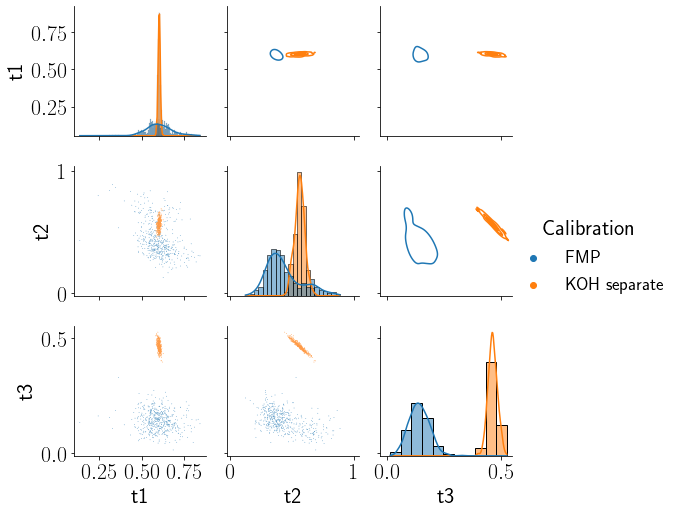

In [26]:
#plot des échantillons KOH et OPT
df1=pd.DataFrame(data=samples_koh,columns=['t1','t2','t3'])
df1['Calibration']='KOH separate'
df2=pd.DataFrame(data=samples_opt,columns=['t1','t2','t3'])
df2['Calibration']='FMP'

df=pd.concat([df2,df1],ignore_index=True)

g = sns.PairGrid(df,hue='Calibration',diag_sharey=False)
g.map_diag(sns.histplot,kde=True)
g.map_upper(sns.kdeplot,levels=5)
g.map_lower(sns.scatterplot,s=0.5)
g.add_legend()

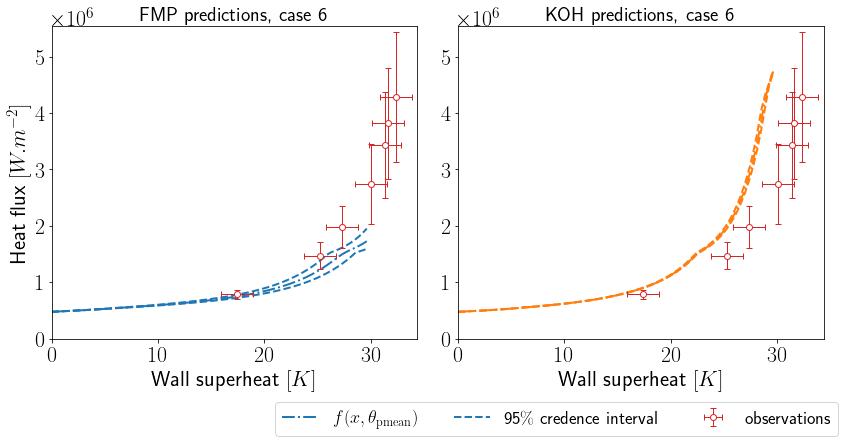

In [15]:
#plot prédictions withmean finales


colorfz='cyan'
colorf='tab:blue'
colorfzkoh='gold'
colorfkoh='tab:orange'
lw2=2
lw1=2
case=6

#cases=['3','4','5','6','14','15','16','18','20','21','22','23']
foldname='NIGP/results/'
foldname2='NIGP/results/predsfinal/opt/'
foldnamekoh='NIGP/results/predsfinal/koh/'
obs=pd.DataFrame(data=np.loadtxt(foldname+'obs'+str(case)+'.gnu'),columns=['x','y','incx','incy'])
p=pd.DataFrame(data=np.loadtxt(foldname2+'predsF'+str(case)+'.gnu'),columns=['x','useless','q25','q75','q2p5','q97p5'])

pkoh=pd.DataFrame(data=np.loadtxt(foldnamekoh+'predsF'+str(case)+'.gnu'),columns=['x','useless','q25','q75','q2p5','q97p5'])

fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(12,6))
axs[0].plot(p['x'],p['useless'],linewidth=lw2,linestyle='-.',color=colorf,label=r'$f(x,\theta_{\mathrm{pmean}})$')
axs[0].plot(p['x'],p['q97p5'],linewidth=lw1,linestyle='--',color=colorf,label=r'95$\%$ credence interval')
axs[0].plot(p['x'],p['q2p5'],linewidth=lw1,linestyle='--',color=colorf)

axs[1].plot(p['x'],pkoh['useless'],linewidth=lw2,linestyle='-.',color=colorfkoh,label=r'$f(x,\theta_{\mathrm{pmean}})$')
axs[1].plot(p['x'],pkoh['q97p5'],linewidth=lw1,linestyle='--',color=colorfkoh,label=r'95$\%$ credence interval')
axs[1].plot(p['x'],pkoh['q2p5'],linewidth=lw1,linestyle='--',color=colorfkoh)


ls=['s1','s2','s3','s4','s5','s6','s7','s8','s9']
#ls=['s5']

   
axs[0].errorbar(obs['x'],obs['y'],yerr=3*obs['incy'],xerr=3*obs['incx'],
             color='tab:red',marker='o',ms=6,mfc='white',
             capsize=3,linewidth=0,elinewidth=1,
             label='observations',zorder=100)

axs[1].errorbar(obs['x'],obs['y'],yerr=3*obs['incy'],xerr=3*obs['incx'],
             color='tab:red',marker='o',ms=6,mfc='white',
             capsize=3,linewidth=0,elinewidth=1,
             label='observations',zorder=100)

axs[0].set_xlim([0,obs['x'][len(obs['x'])-1]+2])
axs[0].set_ylim([0,obs['y'][len(obs['y'])-1]+3*obs['incy'][len(obs['y'])-1]+1e5])
axs[0].set_xlabel('Wall superheat $[K]$')
axs[0].set_ylabel('Heat flux $[W.m^{-2}]$')
axs[0].set_title('FMP predictions, case '+str(case),fontsize=20)

axs[1].set_xlim([0,obs['x'][len(obs['x'])-1]+2])
axs[1].set_ylim([0,obs['y'][len(obs['y'])-1]+3*obs['incy'][len(obs['y'])-1]+1e5])
axs[1].set_xlabel('Wall superheat $[K]$')
#axs[1].set_ylabel('Heat flux $[W.m^{-2}]$')
axs[1].set_title('KOH predictions, case '+str(case),fontsize=20)
#print(obs)
plt.tight_layout()


axs[0].legend(ncol=5,bbox_to_anchor=(1, 0.05),
          bbox_transform=fig.transFigure)


In [97]:
allsamp=np.loadtxt(foldname+"save/sampopt16.gnu")[:,0:3]
allsamp=pd.DataFrame(data=allsamp,columns=['t1','t2','t3'])
#allsampkoh=np.loadtxt(foldname+'save/sampleskoh.gnu')[:,0:3]
#allsampkoh=pd.DataFrame(data=allsampkoh,columns=['t1','t2','t3'])
#allsampkohsep=np.loadtxt(foldname+'save/sampleskohsep.gnu')[:,0:3]
#allsampkohsep=pd.DataFrame(data=allsampkohsep,columns=['t1','t2','t3'])

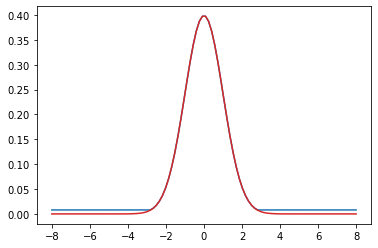

In [23]:
#quel facteur de réduction pour une gaussienne ?
import math

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma-5, mu + 3*sigma+5, 100)
a=np.ones(100)*0.4/50
#print(a)
xp = np.maximum(stats.norm.pdf(x, mu, sigma),a)
#print(xp)
plt.plot(x, xp,color='tab:blue')
plt.plot(x, stats.norm.pdf(x, mu, sigma),color='tab:red')
plt.show()

3.912023005428146

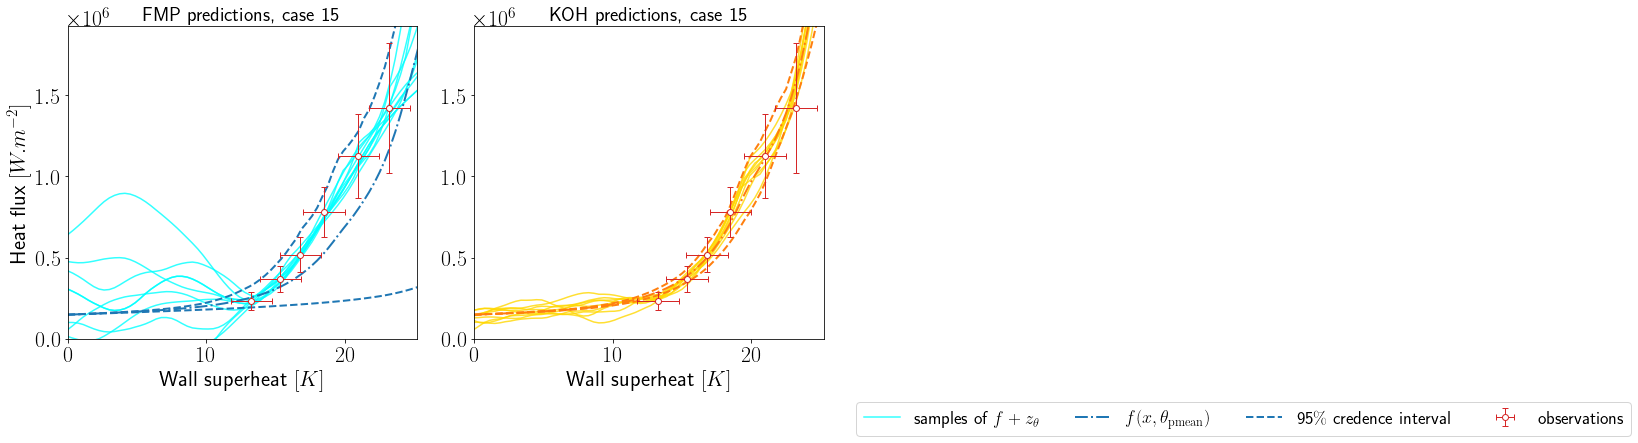

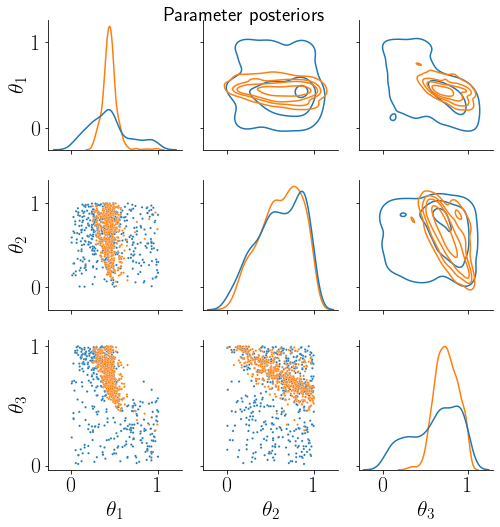

In [109]:
#plot combiné prédictions et postérieures
#belles figures pour l'affichage de prédictions zeromean.
colorfz='cyan'
colorf='tab:blue'
colorfzkoh='gold'
colorfkoh='tab:orange'
lw2=2
lw1=2
case=15

#cases=['3','4','5','6','14','15','16','18','20','21','22','23']
foldname='NIGP_zeromean/results/'
foldname2='NIGP_zeromean/results/separatedensities/opt/'
foldnamekoh='NIGP_zeromean/results/separatedensities/kohs/'
obs=pd.DataFrame(data=np.loadtxt(foldname+'obs'+str(case)+'.gnu'),columns=['x','y','incx','incy'])
p=pd.DataFrame(data=np.loadtxt(foldname2+'predsF'+str(case)+'.gnu'),columns=['x','useless','q25','q75','q2p5','q97p5','fmean'])
pFZ=pd.DataFrame(data=np.loadtxt(foldname2+'preds'+str(case)+'.gnu'),columns=['x','mean','std','stdz','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10'])

pkoh=pd.DataFrame(data=np.loadtxt(foldnamekoh+'predsF'+str(case)+'.gnu'),columns=['x','useless','q25','q75','q2p5','q97p5','fmean'])
pFZkoh=pd.DataFrame(data=np.loadtxt(foldnamekoh+'preds'+str(case)+'.gnu'),columns=['x','mean','std','stdz','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10'])

fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(12,6))
axs[0].plot(pFZ['x'],pFZ['s1'],linewidth=1.5,color=colorfz,zorder=0,alpha=0.8,label=r'samples of $f+z_{\theta}$')
axs[0].plot(p['x'],p['useless'],linewidth=lw2,linestyle='-.',color=colorf,label=r'$f(x,\theta_{\mathrm{pmean}})$')
axs[0].plot(p['x'],p['q97p5'],linewidth=lw1,linestyle='--',color=colorf,label=r'95$\%$ credence interval')
axs[0].plot(p['x'],p['q2p5'],linewidth=lw1,linestyle='--',color=colorf)

axs[1].plot(p['x'],pkoh['useless'],linewidth=lw2,linestyle='-.',color=colorfkoh,label=r'$f(x,\theta_{\mathrm{pmean}})$')
axs[1].plot(p['x'],pkoh['q97p5'],linewidth=lw1,linestyle='--',color=colorfkoh,label=r'95$\%$ credence interval')
axs[1].plot(p['x'],pkoh['q2p5'],linewidth=lw1,linestyle='--',color=colorfkoh)

###load dfs
dfopt=pd.DataFrame(data=np.loadtxt(foldname2+'samp'+str(case)+'.gnu')[:,:3],columns=[r'$\theta_1$',r'$\theta_2$',r'$\theta_3$'])
dfkohs=pd.DataFrame(data=np.loadtxt(foldnamekoh+'samp'+str(case)+'.gnu')[:,:3],columns=[r'$\theta_1$',r'$\theta_2$',r'$\theta_3$'])
dfopt['Calibration']='FMP'
dfkohs['Calibration']='KOH separate'
df=pd.concat([dfopt,dfkohs],ignore_index=True)

ls=['s1','s2','s3','s4','s5','s6','s7','s8','s9']
#ls=['s5']

for s in ls:
    axs[0].plot(pFZ['x'],pFZ[s],linewidth=1.5,color=colorfz,zorder=0,alpha=0.8)
    axs[1].plot(pFZ['x'],pFZkoh[s],linewidth=1.5,color=colorfzkoh,zorder=0,alpha=0.8)
    
axs[0].errorbar(obs['x'],obs['y'],yerr=3*obs['incy'],xerr=3*obs['incx'],
             color='tab:red',marker='o',ms=6,mfc='white',
             capsize=3,linewidth=0,elinewidth=1,
             label='observations',zorder=100)

axs[1].errorbar(obs['x'],obs['y'],yerr=3*obs['incy'],xerr=3*obs['incx'],
             color='tab:red',marker='o',ms=6,mfc='white',
             capsize=3,linewidth=0,elinewidth=1,
             label='observations',zorder=100)

axs[0].set_xlim([0,obs['x'][len(obs['x'])-1]+2])
axs[0].set_ylim([0,obs['y'][len(obs['y'])-1]+3*obs['incy'][len(obs['y'])-1]+1e5])
axs[0].set_xlabel('Wall superheat $[K]$')
axs[0].set_ylabel('Heat flux $[W.m^{-2}]$')
axs[0].set_title('FMP predictions, case '+str(case),fontsize=20)

axs[1].set_xlim([0,obs['x'][len(obs['x'])-1]+2])
axs[1].set_ylim([0,obs['y'][len(obs['y'])-1]+3*obs['incy'][len(obs['y'])-1]+1e5])
axs[1].set_xlabel('Wall superheat $[K]$')
#axs[1].set_ylabel('Heat flux $[W.m^{-2}]$')
axs[1].set_title('KOH predictions, case '+str(case),fontsize=20)
#print(obs)
plt.tight_layout()

g = sns.PairGrid(df,hue='Calibration',diag_sharey=False,
                palette={
                    'FMP':colorf,
                    'KOH separate':colorfkoh
                })
g.map_diag(sns.kdeplot)
g.map_upper(sns.kdeplot,levels=5)
g.map_lower(sns.scatterplot,s=5)
g.fig.suptitle('Parameter posteriors',fontsize=20)
axs[0].legend(ncol=5,bbox_to_anchor=(1, 0.05),
          bbox_transform=fig.transFigure)


CPU times: user 2min 15s, sys: 216 ms, total: 2min 15s
Wall time: 2min 14s


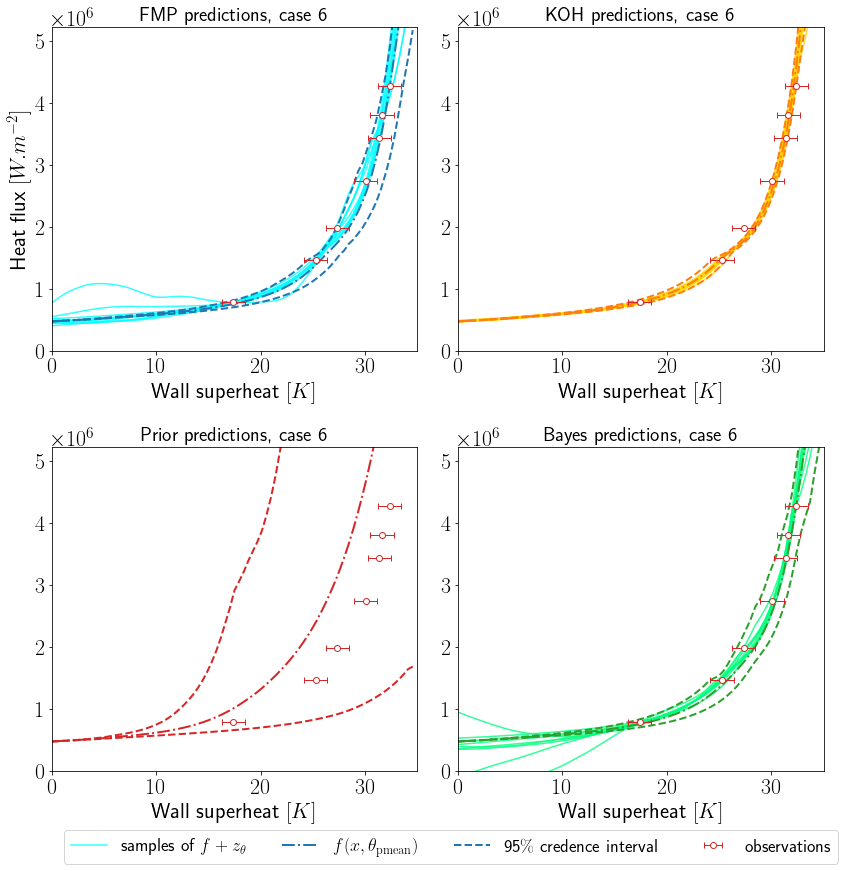

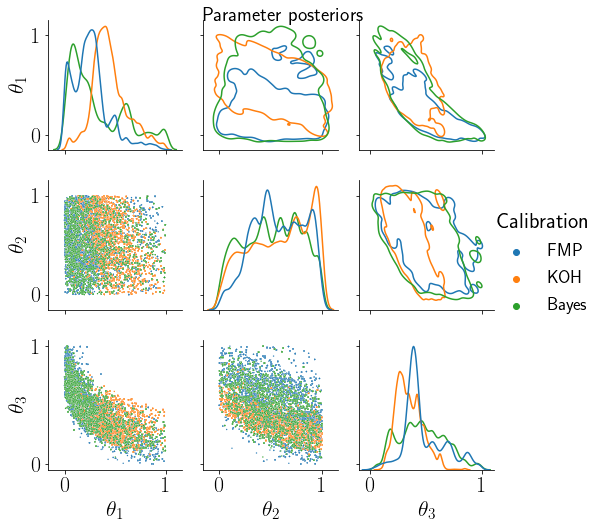

In [60]:
%%time
#belles figures pour l'affichage de prédictions zeromean, avec prédictions bayes.
colorfz='cyan'
colorf='tab:blue'
colorfzkoh='gold'
colorfkoh='tab:orange'
colorfzfb='springgreen'
colorffb='tab:green'
colorpri='tab:red'
lw2=2
lw1=2
case=6
#prédictions bayes disponibles seulement sur les cas 3,4,6,16,20
#cases=['3','4','5','6',8,9,'14','15','16','18','20','21','22','23',24]
#le cas 8 a des observations relou.
foldname='NIGP_zeromean/results/'
foldname2='NIGP_zeromean/results/separatedensities/opt/'
foldnamekoh='NIGP_zeromean/results/separatedensities/kohs/'
foldnamefb='NIGP_zeromean/results/separatedensities/fb/'
foldnameprior='NIGP_zeromean/results/fulldensities/prior/'
obs=pd.DataFrame(data=np.loadtxt(foldname+'obs'+str(case)+'.gnu'),columns=['x','y','incx','incy'])
p=pd.DataFrame(data=np.loadtxt(foldname2+'predsF'+str(case)+'.gnu'),columns=['x','useless','q25','q75','q2p5','q97p5'])
pFZ=pd.DataFrame(data=np.loadtxt(foldname2+'preds'+str(case)+'.gnu'),columns=['x','mean','std','stdz','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10'])

pkoh=pd.DataFrame(data=np.loadtxt(foldnamekoh+'predsF'+str(case)+'.gnu'),columns=['x','useless','q25','q75','q2p5','q97p5'])
pFZkoh=pd.DataFrame(data=np.loadtxt(foldnamekoh+'preds'+str(case)+'.gnu'),columns=['x','mean','std','stdz','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10'])

pfb=pd.DataFrame(data=np.loadtxt(foldnamefb+'predsF'+str(case)+'.gnu'),columns=['x','useless','q25','q75','q2p5','q97p5'])
pFZfb=pd.DataFrame(data=np.loadtxt(foldnamefb+'preds'+str(case)+'.gnu'),columns=['x','mean','std','stdz','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10'])

ppri=pd.DataFrame(data=np.loadtxt(foldnameprior+'predsF'+str(case)+'.gnu'),columns=['x','useless','q25','q75','q2p5','q97p5'])


fig,axs=plt.subplots(nrows=2,ncols=2,figsize=(12,12))
axs[0,0].plot(pFZ['x'],pFZ['s1'],linewidth=1.5,color=colorfz,zorder=0,alpha=0.8,label=r'samples of $f+z_{\theta}$')
axs[0,0].plot(p['x'],p['useless'],linewidth=lw2,linestyle='-.',color=colorf,label=r'$f(x,\theta_{\mathrm{pmean}})$')
axs[0,0].plot(p['x'],p['q97p5'],linewidth=lw1,linestyle='--',color=colorf,label=r'95$\%$ credence interval')
axs[0,0].plot(p['x'],p['q2p5'],linewidth=lw1,linestyle='--',color=colorf)

axs[0,1].plot(p['x'],pkoh['useless'],linewidth=lw2,linestyle='-.',color=colorfkoh,label=r'$f(x,\theta_{\mathrm{pmean}})$')
axs[0,1].plot(p['x'],pkoh['q97p5'],linewidth=lw1,linestyle='--',color=colorfkoh,label=r'95$\%$ credence interval')
axs[0,1].plot(p['x'],pkoh['q2p5'],linewidth=lw1,linestyle='--',color=colorfkoh)

axs[1,1].plot(p['x'],pfb['useless'],linewidth=lw2,linestyle='-.',color=colorffb,label=r'$f(x,\theta_{\mathrm{pmean}})$')
axs[1,1].plot(p['x'],pfb['q97p5'],linewidth=lw1,linestyle='--',color=colorffb,label=r'95$\%$ credence interval')
axs[1,1].plot(p['x'],pfb['q2p5'],linewidth=lw1,linestyle='--',color=colorffb)

axs[1,0].plot(p['x'],ppri['useless'],linewidth=lw2,linestyle='-.',color=colorpri,label=r'$f(x,\theta_{\mathrm{pmean}})$')
axs[1,0].plot(p['x'],ppri['q97p5'],linewidth=lw1,linestyle='--',color=colorpri,label=r'95$\%$ credence interval')
axs[1,0].plot(p['x'],ppri['q2p5'],linewidth=lw1,linestyle='--',color=colorpri)

ls=['s1','s2','s3','s4','s5','s6','s7','s8','s9']
#ls=['s5']

for s in ls:
    axs[0,0].plot(pFZ['x'],pFZ[s],linewidth=1.5,color=colorfz,zorder=0,alpha=0.8)
    axs[0,1].plot(pFZ['x'],pFZkoh[s],linewidth=1.5,color=colorfzkoh,zorder=0,alpha=0.8)
    axs[1,1].plot(pFZ['x'],pFZfb[s],linewidth=1.5,color=colorfzfb,zorder=0,alpha=0.8)
    
axs[0,0].errorbar(obs['x'],obs['y'],xerr=3*obs['incx'],
             color='tab:red',marker='o',ms=6,mfc='white',
             capsize=3,linewidth=0,elinewidth=1,
             label='observations',zorder=100)

axs[0,1].errorbar(obs['x'],obs['y'],xerr=3*obs['incx'],
             color='tab:red',marker='o',ms=6,mfc='white',
             capsize=3,linewidth=0,elinewidth=1,
             label='observations',zorder=100)
axs[1,1].errorbar(obs['x'],obs['y'],xerr=3*obs['incx'],
             color='tab:red',marker='o',ms=6,mfc='white',
             capsize=3,linewidth=0,elinewidth=1,
             label='observations',zorder=100)

axs[1,0].errorbar(obs['x'],obs['y'],xerr=3*obs['incx'],
             color='tab:red',marker='o',ms=6,mfc='white',
             capsize=3,linewidth=0,elinewidth=1,
             label='observations',zorder=100)

axs[0,0].set_xlim([0,35])
axs[0,0].set_ylim([0,obs['y'][len(obs['y'])-1]+3*obs['incy'][len(obs['y'])-1]+1e5])
axs[0,0].set_xlabel('Wall superheat $[K]$')
axs[0,0].set_ylabel('Heat flux $[W.m^{-2}]$')
axs[0,0].set_title('FMP predictions, case '+str(case),fontsize=20)

axs[0,1].set_xlim([0,35])
axs[0,1].set_ylim([0,obs['y'][len(obs['y'])-1]+3*obs['incy'][len(obs['y'])-1]+1e5])
axs[0,1].set_xlabel('Wall superheat $[K]$')
#axs[1].set_ylabel('Heat flux $[W.m^{-2}]$')
axs[0,1].set_title('KOH predictions, case '+str(case),fontsize=20)

axs[1,1].set_xlim([0,35])
axs[1,1].set_ylim([0,obs['y'][len(obs['y'])-1]+3*obs['incy'][len(obs['y'])-1]+1e5])
axs[1,1].set_xlabel('Wall superheat $[K]$')
#axs[1].set_ylabel('Heat flux $[W.m^{-2}]$')
axs[1,1].set_title('Bayes predictions, case '+str(case),fontsize=20)

axs[1,0].set_xlim([0,35])
axs[1,0].set_ylim([0,obs['y'][len(obs['y'])-1]+3*obs['incy'][len(obs['y'])-1]+1e5])
axs[1,0].set_xlabel('Wall superheat $[K]$')
#axs[1].set_ylabel('Heat flux $[W.m^{-2}]$')
axs[1,0].set_title('Prior predictions, case '+str(case),fontsize=20)
#print(obs)
plt.tight_layout()

axs[0,0].legend(ncol=5,bbox_to_anchor=(1, 0.03),
          bbox_transform=fig.transFigure)



###################postérieures
###load dfs
dfopt=pd.DataFrame(data=np.loadtxt(foldname2+'allsamp'+str(case)+'.gnu')[-30000:,:3],columns=[r'$\theta_1$',r'$\theta_2$',r'$\theta_3$'])
dfkohs=pd.DataFrame(data=np.loadtxt(foldnamekoh+'allsamp'+str(case)+'.gnu')[-30000:,:3],columns=[r'$\theta_1$',r'$\theta_2$',r'$\theta_3$'])
dffb=pd.DataFrame(data=np.loadtxt(foldnamefb+'allsamp'+str(case)+'.gnu')[-30000:,:3],columns=[r'$\theta_1$',r'$\theta_2$',r'$\theta_3$'])

dfopt['Calibration']='FMP'
dfkohs['Calibration']='KOH'
dffb['Calibration']='Bayes'
df=pd.concat([dfopt,dfkohs,dffb],ignore_index=True)

g = sns.PairGrid(df,hue='Calibration',diag_sharey=False,
                palette={
                    'FMP':colorf,
                    'KOH':colorfkoh,
                    'Bayes':colorffb
                })
g.map_diag(sns.kdeplot)
g.map_upper(sns.kdeplot,levels=2)
g.map_lower(sns.scatterplot,s=2)
g.fig.suptitle('Parameter posteriors',fontsize=20)
g.add_legend()
#ls=['s5']

<ErrorbarContainer object of 3 artists>

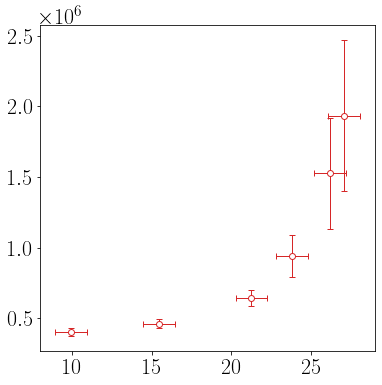

In [20]:
#affichons les observations 8 et 9.

obs5=pd.DataFrame(data=np.loadtxt(foldname+'obs'+str(5)+'.gnu'),columns=['x','y','incx','incy'])
fig,axs=plt.subplots(nrows=1,ncols=1,figsize=(6,6))

axs.errorbar(obs5['x'],obs5['y'],xerr=2*obs5['incx'],yerr=2*obs5['incy'],
             color='tab:red',marker='o',ms=6,mfc='white',
             capsize=3,linewidth=0,elinewidth=1,
             label='observations',zorder=100)




In [23]:
%%time
#construction des KDE KOH zero mean
foldnamekzm='NIGP_zeromean/results/separatedensities/kohs/'
cases=['3','4','5','6','14','15','16','18','20','21','22','23']
#cases=['3']
filenameskzm=[foldnamekzm+'samp'+lab+'.gnu' for lab in cases]
dfskzm=[pd.DataFrame(data=np.loadtxt(x)[:,:3],columns=['t1','t2','t3']) for x in filenameskzm]
#print(dfs)
kdeskzm=[stats.gaussian_kde(df.transpose()) for df in dfskzm]
#attention c'est bien le log qu'on utilise pour la mcmc.
def compute_score_koh_zm(x):
    #print([np.log(kde.evaluate(x)+1e-13) for kde in kdes])
    return sum([np.log(kde.evaluate(x)+1e-300) for kde in kdeskzm])
compute_score_koh_zm([0.5,0.5,0.9])








CPU times: user 65.2 ms, sys: 2 µs, total: 65.2 ms
Wall time: 62.6 ms


array([-577.97265696])

In [24]:
%%time
#Metropolis-Hastings KOH zero mean

# Metropolis Hastings sampling from the posterior distribution

Nsteps = int(1e6)
Nburn = int(1e5)
Nsamples = 500
f = Nsteps/Nsamples
naccept=0

xinit = 0.5*np.ones((3))
covinit = np.eye(3)*0.05**2

burns= []
samples_koh_zm = []

#burn phase
x = xinit
s = compute_score_koh_zm(xinit)
for i in range(Nburn):
    xn = np.random.multivariate_normal(x,covinit)
    sn = compute_score_koh_zm(xn)
    if sn-s>np.log(np.random.rand()):
        naccept+=1
        x = xn
        s = sn
    burns.append(x)
print('accept rate burn phase : '+str(100*((1.0*naccept)/Nburn)))
naccept=0
#calcul de la matrice de covariance
burns=np.array(burns)
print(burns)

cov=((2.38**2)/3)*np.cov(np.array(burns).transpose())
print('new cov matrix : ')
print(cov)
#sampling phase

for i in range(Nsteps):
    xn = np.random.multivariate_normal(x,cov)
    sn = compute_score_koh_zm(xn)
    if sn-s>np.log(np.random.rand()):
        naccept+=1
        x = xn
        s = sn
    if i % f == 0:
        samples_koh_zm.append(x)

samples_koh_zm = np.array(samples_koh_zm)

print('final accept rate: '+str(100*((1.0*naccept)/Nsteps)))
print('samples :')
print(len(samples_koh_zm))
print(samples_koh_zm)

accept rate burn phase : 13.08
[[0.5        0.5        0.5       ]
 [0.5        0.5        0.5       ]
 [0.5        0.5        0.5       ]
 ...
 [0.79205086 0.19838611 0.48072398]
 [0.79205086 0.19838611 0.48072398]
 [0.79205086 0.19838611 0.48072398]]
new cov matrix : 
[[ 0.01527547 -0.0203943  -0.00205294]
 [-0.0203943   0.0356293  -0.0006414 ]
 [-0.00205294 -0.0006414   0.0019668 ]]
final accept rate: 16.3584
samples :
500
[[0.79205086 0.19838611 0.48072398]
 [0.74055494 0.28646365 0.45517366]
 [0.70177383 0.32560599 0.48842912]
 ...
 [0.49996768 0.69315879 0.49159555]
 [0.56149733 0.63580841 0.45612018]
 [0.78583647 0.2704283  0.44158805]]
CPU times: user 13min 51s, sys: 31.6 ms, total: 13min 51s
Wall time: 13min 50s


In [18]:
%%time
#construction des KDE OPTI zero mean
foldnameozm='NIGP_zeromean/results/separatedensities/opt/'
cases=['3','4','5','6','14','15','16','18','20','21','22','23']
#cases=['3']
filenamesozm=[foldnameozm+'samp'+lab+'.gnu' for lab in cases]
dfsozm=[pd.DataFrame(data=np.loadtxt(x)[:,:3],columns=['t1','t2','t3']) for x in filenamesozm]
#print(dfs)
kdesozm=[stats.gaussian_kde(df.transpose()) for df in dfsozm]
#attention c'est bien le log qu'on utilise pour la mcmc.
def compute_score_opt_zm(x):
    #print([np.log(kde.evaluate(x)+1e-13) for kde in kdes])
    return sum([np.log(kde.evaluate(x)) for kde in kdesozm])
compute_score_opt_zm([0.5,0.5,0.9])








CPU times: user 80.8 ms, sys: 8 µs, total: 80.8 ms
Wall time: 77.9 ms


array([-346.22918609])

In [19]:
%%time
#Metropolis-Hastings OPT zero mean

# Metropolis Hastings sampling from the posterior distribution

Nsteps = int(1e6)
Nburn = int(1e5)
Nsamples = 500
f = Nsteps/Nsamples
naccept=0

xinit = 0.5*np.ones((3))
covinit = np.eye(3)*0.05**2

burns= []
samples_opt_zm = []

#burn phase
x = xinit
s = compute_score_opt_zm(xinit)
for i in range(Nburn):
    xn = np.random.multivariate_normal(x,covinit)
    sn = compute_score_opt_zm(xn)
    if sn-s>np.log(np.random.rand()):
        naccept+=1
        x = xn
        s = sn
    burns.append(x)
print('accept rate burn phase : '+str(100*((1.0*naccept)/Nburn)))
naccept=0
#calcul de la matrice de covariance
burns=np.array(burns)
print(burns)

cov=((2.38**2)/3)*np.cov(np.array(burns).transpose())
print('new cov matrix : ')
print(cov)
#sampling phase

for i in range(Nsteps):
    xn = np.random.multivariate_normal(x,cov)
    sn = compute_score_opt_zm(xn)
    if sn-s>np.log(np.random.rand()):
        naccept+=1
        x = xn
        s = sn
    if i % f == 0:
        samples_opt_zm.append(x)

samples_opt_zm = np.array(samples_opt_zm)

print('final accept rate: '+str(100*((1.0*naccept)/Nsteps)))
print('samples :')
print(len(samples_opt_zm))
print(samples_opt_zm)

accept rate burn phase : 22.814
[[0.44012845 0.50521199 0.54897206]
 [0.38645733 0.53550747 0.53555716]
 [0.38645733 0.53550747 0.53555716]
 ...
 [0.90840454 0.2478921  0.318703  ]
 [0.90840454 0.2478921  0.318703  ]
 [0.86469242 0.25564337 0.33081663]]
new cov matrix : 
[[ 0.09003837 -0.05528224 -0.03412613]
 [-0.05528224  0.04536383  0.01607754]
 [-0.03412613  0.01607754  0.01577937]]
final accept rate: 10.2982
samples :
500
[[0.74560799 0.3633775  0.35067391]
 [0.16275985 0.68238824 0.64708449]
 [0.89253768 0.32080494 0.30206056]
 ...
 [0.73711921 0.27449239 0.41794378]
 [0.79578418 0.23308439 0.35622795]
 [0.82247648 0.31195557 0.36147656]]
CPU times: user 19min 50s, sys: 50.7 ms, total: 19min 50s
Wall time: 19min 50s


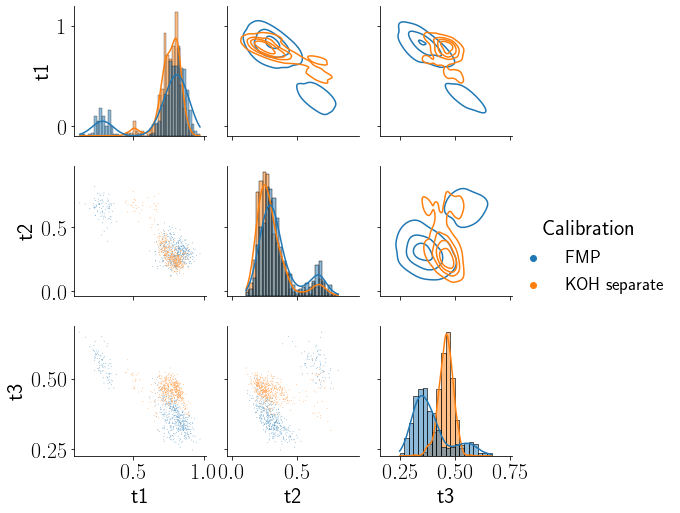

In [25]:
#plot des échantillons KOH et OPT
df1=pd.DataFrame(data=samples_koh_zm,columns=['t1','t2','t3'])
df1['Calibration']='KOH separate'
df2=pd.DataFrame(data=samples_opt_zm,columns=['t1','t2','t3'])
df2['Calibration']='FMP'
#df3=pd.DataFrame(data=samples_opt2,columns=['t1','t2','t3'])
#df3['Calibration']='FMP2'
df=pd.concat([df2,df1],ignore_index=True)

g = sns.PairGrid(df,hue='Calibration',diag_sharey=False)
g.map_diag(sns.histplot,kde=True)
g.map_upper(sns.kdeplot,levels=5)
g.map_lower(sns.scatterplot,s=0.5)
g.add_legend()

In [39]:
#maintenant il faut voir ce que ces samples donnent après calibration.
#écriture des samples dans un fichier.
np.savetxt("NIGP_zeromean/results/samplespython/sampleskoh.gnu", samples_koh_zm, delimiter=" ")
np.savetxt("NIGP_zeromean/results/samplespython/samplesopt.gnu", samples_opt_zm, delimiter=" ")
#sampopt=samples

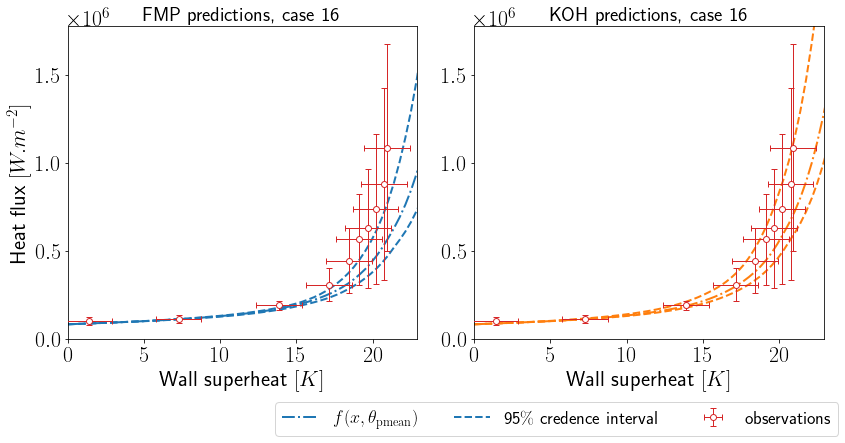

In [132]:
#plot combiné prédictions et postérieures
#belles figures pour l'affichage de prédictions zeromean finales
colorfz='cyan'
colorf='tab:blue'
colorfzkoh='gold'
colorfkoh='tab:orange'
lw2=2
lw1=2
case=16

#cases=['3','4','5','6','14','15','16','18','20','21','22','23']
foldname='NIGP_zeromean/results/'
foldname2='NIGP_zeromean/results/predsfinal/opt/'
foldnamekoh='NIGP_zeromean/results/predsfinal/koh/'
obs=pd.DataFrame(data=np.loadtxt(foldname+'obs'+str(case)+'.gnu'),columns=['x','y','incx','incy'])
p=pd.DataFrame(data=np.loadtxt(foldname2+'predsF'+str(case)+'.gnu'),columns=['x','useless','q25','q75','q2p5','q97p5'])

pkoh=pd.DataFrame(data=np.loadtxt(foldnamekoh+'predsF'+str(case)+'.gnu'),columns=['x','useless','q25','q75','q2p5','q97p5'])

fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(12,6))
axs[0].plot(p['x'],p['useless'],linewidth=lw2,linestyle='-.',color=colorf,label=r'$f(x,\theta_{\mathrm{pmean}})$')
axs[0].plot(p['x'],p['q97p5'],linewidth=lw1,linestyle='--',color=colorf,label=r'95$\%$ credence interval')
axs[0].plot(p['x'],p['q2p5'],linewidth=lw1,linestyle='--',color=colorf)

axs[1].plot(p['x'],pkoh['useless'],linewidth=lw2,linestyle='-.',color=colorfkoh,label=r'$f(x,\theta_{\mathrm{pmean}})$')
axs[1].plot(p['x'],pkoh['q97p5'],linewidth=lw1,linestyle='--',color=colorfkoh,label=r'95$\%$ credence interval')
axs[1].plot(p['x'],pkoh['q2p5'],linewidth=lw1,linestyle='--',color=colorfkoh)


ls=['s1','s2','s3','s4','s5','s6','s7','s8','s9']
#ls=['s5']

   
axs[0].errorbar(obs['x'],obs['y'],yerr=3*obs['incy'],xerr=3*obs['incx'],
             color='tab:red',marker='o',ms=6,mfc='white',
             capsize=3,linewidth=0,elinewidth=1,
             label='observations',zorder=100)

axs[1].errorbar(obs['x'],obs['y'],yerr=3*obs['incy'],xerr=3*obs['incx'],
             color='tab:red',marker='o',ms=6,mfc='white',
             capsize=3,linewidth=0,elinewidth=1,
             label='observations',zorder=100)

axs[0].set_xlim([0,obs['x'][len(obs['x'])-1]+2])
axs[0].set_ylim([0,obs['y'][len(obs['y'])-1]+3*obs['incy'][len(obs['y'])-1]+1e5])
axs[0].set_xlabel('Wall superheat $[K]$')
axs[0].set_ylabel('Heat flux $[W.m^{-2}]$')
axs[0].set_title('FMP predictions, case '+str(case),fontsize=20)

axs[1].set_xlim([0,obs['x'][len(obs['x'])-1]+2])
axs[1].set_ylim([0,obs['y'][len(obs['y'])-1]+3*obs['incy'][len(obs['y'])-1]+1e5])
axs[1].set_xlabel('Wall superheat $[K]$')
#axs[1].set_ylabel('Heat flux $[W.m^{-2}]$')
axs[1].set_title('KOH predictions, case '+str(case),fontsize=20)
#print(obs)
plt.tight_layout()


axs[0].legend(ncol=5,bbox_to_anchor=(1, 0.05),
          bbox_transform=fig.transFigure)


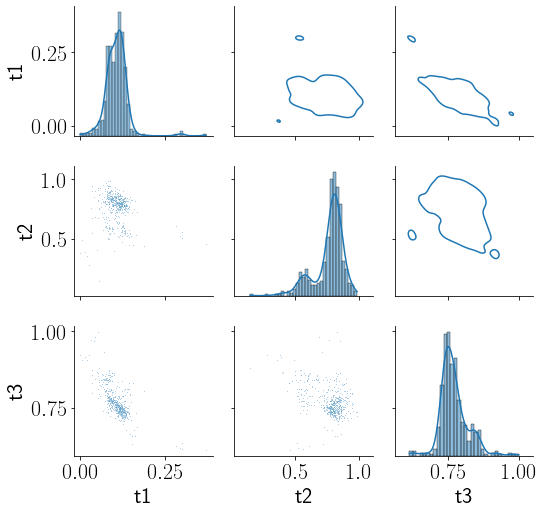

In [131]:
# OPT globale. Qu'est-ce que ça donne ? 
#différent de celle qu'on obtient par multiplication de toutes les dens séparées
#plot des échantillons KOH et OPT
df1=pd.DataFrame(data=np.loadtxt("NIGP_zeromean/results/save/sampopt16.gnu")[:,:3],columns=['t1','t2','t3'])

#df3=pd.DataFrame(data=samples_opt2,columns=['t1','t2','t3'])
#df3['Calibration']='FMP2'

g = sns.PairGrid(df1,diag_sharey=False)
g.map_diag(sns.histplot,kde=True)
g.map_upper(sns.kdeplot,levels=2)
g.map_lower(sns.scatterplot,s=0.5)
g.add_legend()

Text(0, 0.5, 'Heat flux $[W.m^{-2}]$')

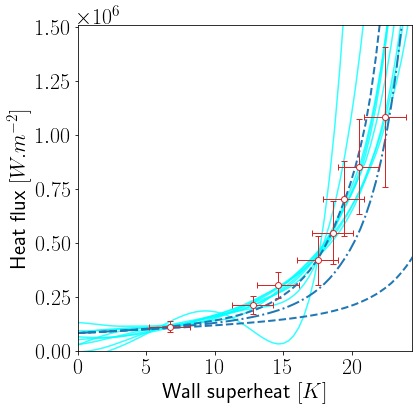

In [136]:
#regardons les nouvelles prédictions OPT full obtenue sur VSCode
#belles figures pour l'affichage de prédictions.
colorfz='cyan'
colorf='tab:blue'
colorfzkoh='gold'
colorfkoh='tab:orange'
lw2=2
lw1=2
case=20

#cases=['3','4','5','6','14','15','16','18','20','21','22','23']
foldname='NIGP/results/'
foldname2='NIGP/results/preds/predsopt'
foldname3='NIGP/results/preds/predsoptF'

obs=pd.DataFrame(data=np.loadtxt(foldname+'obs'+str(case)+'.gnu'),columns=['x','y','incx','incy'])
p=pd.DataFrame(data=np.loadtxt(foldname3+str(case)+'.gnu'),columns=['x','useless','q25','q75','q2p5','q97p5','fmean'])
pFZ=pd.DataFrame(data=np.loadtxt(foldname2+str(case)+'.gnu'),columns=['x','mean','std','stdz','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10'])


fig,axs=plt.subplots(nrows=1,ncols=1,figsize=(6,6))
axs.plot(p['x'],p['useless'],linewidth=lw2,linestyle='-.',color=colorf,label=r'$f(x,\theta_{\mathrm{pmean}})$')
axs.plot(p['x'],p['q97p5'],linewidth=lw1,linestyle='--',color=colorf,label=r'95$\%$ credence interval')
axs.plot(p['x'],p['q2p5'],linewidth=lw1,linestyle='--',color=colorf)




ls=['s1','s2','s3','s4','s5','s6','s7','s8','s9']
#ls=['s5']
for s in ls:
    axs.plot(pFZ['x'],pFZ[s],linewidth=1.5,color=colorfz,zorder=0,alpha=0.8)
    
axs.errorbar(obs['x'],obs['y'],yerr=3*obs['incy'],xerr=3*obs['incx'],
             color='tab:red',marker='o',ms=6,mfc='white',
             capsize=3,linewidth=0,elinewidth=1,
             label='observations',zorder=100)



axs.set_xlim([0,obs['x'][len(obs['x'])-1]+2])
axs.set_ylim([0,obs['y'][len(obs['y'])-1]+3*obs['incy'][len(obs['y'])-1]+1e5])
axs.set_xlabel('Wall superheat $[K]$')
axs.set_ylabel('Heat flux $[W.m^{-2}]$')


#print(obs)
